In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv('https://drive.switch.ch/index.php/s/UEpTFv2Bfa5C1dd/download')
df.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


In [47]:
df = df.dropna()
df

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,...,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,...,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,...,1.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146022,tom-huddlestone,Tom Huddlestone,Tottenham Hotspur,England,28.12.1986,188.0,80.0,Defensive Midfielder,1,0,...,0.50,3147,21,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968
146023,tomas-rosicky,Tomáš Rosický,Arsenal FC,England,04.10.1980,178.0,67.0,Attacking Midfielder,1,1,...,0.00,3147,21,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968
146024,winston-reid,Winston Reid,West Ham United,England,03.07.1988,190.0,87.0,Center Back,1,0,...,0.50,3147,21,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968
146025,xherdan-shaqiri,Xherdan Shaqiri,Bayern München,Germany,10.10.1991,169.0,72.0,Left Midfielder,1,1,...,0.25,3147,21,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968


# Task 6 - Bayes' Theorem

Remember Bayes' Theorem from the lecture (Theorem 32):

$P(B|A_1, \dots , A_k) = \frac{P(B) * P(A_1, \dots , A_k|B)}{P(A_1, \dots , A_k)}$

$P(B)$ is called **posterior probability**.
$P(A_1, \dots , A_k|B)$ is called **likelihood**.

Assume there is a test for a disease that is 99% accurate. That means that the probability of a false positive is 1% and the probability of a false negative is 1%. The probability of having the disease is 0.1%.


**What is the probability you have the disease if you tested positive?**

From the description we can derive the following probabilities:
$$
\begin{align}
P(\text{disease}) &= 0.001 \\
P(\text{positive} | \text{disease}) &= 0.99 \\
P(\text{positive} | \text{no disease}) &= 0.01
\end{align}
$$

What we want is:

$$
P(\text{disease} | \text{positive}) = \frac{P(\text{disease}) * P(\text{positive} | \text{disease})}{P(\text{positive})}
$$

We need to calculate $P(\text{positive})$ first. We can do that with the law of total probability:

$$
P(\text{positive}) = \underbrace{P(\text{positive} | \text{disease}) * P(\text{disease})}_{\text{Probability that a person who has the disease tests positive}} + \underbrace{P(\text{positive} | \text{no disease}) * P(\text{no disease})}_{\text{Probability that a person who does not have the disease tests positive}}
$$

We consider all the different ways we can get a Positive test result: The person is not sick, but tests positive, and the person IS sick, and tests positive.

We can put the numbers in the formula now:

$$
P(\text{positive}) = 0.99 * 0.001 + 0.01 * 0.999 = 0.01098
$$

And the complete result:

$$
P(\text{disease} | \text{positive}) = \frac{0.001 * 0.99}{0.01098} = 0.09016
$$



In [52]:
# simulation of this problem
NUM_PEOPLE = 1_000_000

# generate people, where 0.1% have the disease
# bonus: what happens if 1% have the disease? 10%?
disease_prob = 0.001
people = np.random.choice([0, 1], size=NUM_PEOPLE, p=[1 - disease_prob, disease_prob])

def test_person(person):
    if person == 1:
        # If the person has the disease, 99% chance of a positive test result
        return np.random.choice([0, 1], p=[0.01, 0.99])
    else:
        # If the person does not have the disease, 1% chance of a positive test result
        return np.random.choice([0, 1], p=[0.99, 0.01])

# apply the test function to all people
results = []
for p in people:
    result = test_person(p)
    results.append(result)

people_w_positive_test = [(result, person) for result, person in zip(results, people) if result == 1]

# calculate how many people have a positive test result AND are sick
people_w_positive_and_sick = [(result, person) for result, person in people_w_positive_test if person == 1]

# calculate the probability
prob_being_sick_given_positive = len(people_w_positive_and_sick) / len(people_w_positive_test)
prob_being_sick_given_positive

0.4957918898240245

# Task 8 - Marginal distribution of player heights
Plot the marginal distribution of player heights.

*Hint*: You can use the seaborn function [`sns.histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html) to plot a histogram.


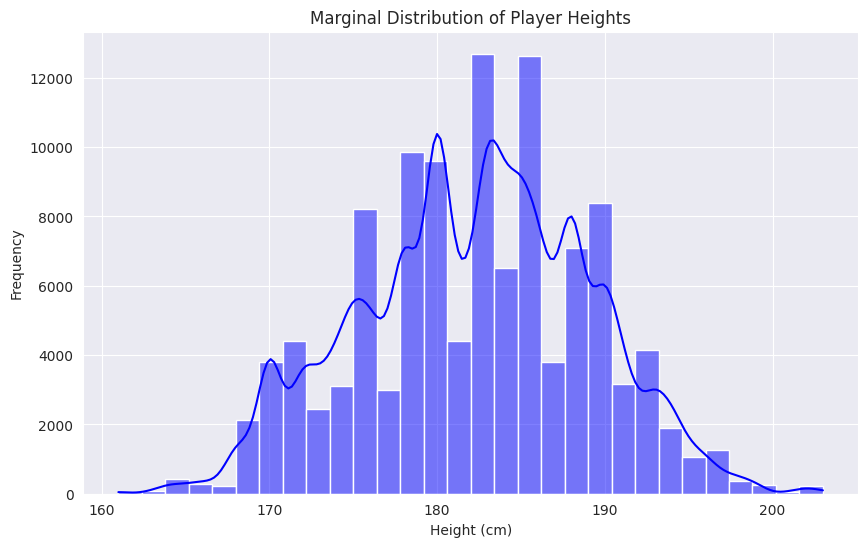

In [5]:
plt.figure(figsize=(10, 6))

# kde=True will show us the kernel density estimate (smoothed histogram)
# we pick bins=30 because our height values are continuous, so we want to split them into 30 bins
sns.histplot(df['height'], kde=True, color='blue', bins=30)
plt.title('Marginal Distribution of Player Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Task 9 - Joint Distribution of player heights and weights
Plot the joint distribution of player heights and weights.

*Hint*: You can use the seaborn function [`sns.jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) to plot a joint distribution.

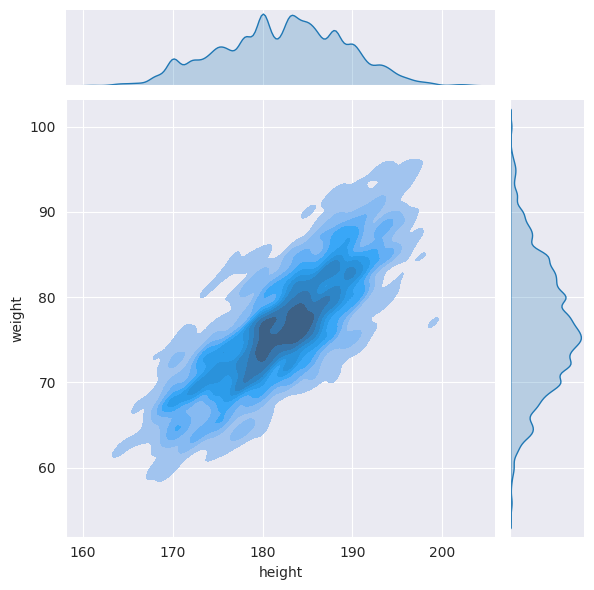

In [6]:
# this is similar to the previous task
# we use kind='kde' to show a kernel density estimate instead of a histogram
sns.jointplot(x='height', y='weight', data=df, kind='kde', fill=True)

plt.show()

# 1. Average cards per game
Calculate the average number of yellow and red cards per game for each player. Then print out the 5 players with the highest average number of cards per game.

In [7]:
df['avg_cards_per_game'] = (df['yellowCards'] + df['redCards']) / df['games']
df.sort_values(by='avg_cards_per_game', ascending=False).head(5)

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,avg_cards_per_game
103688,jean-pascal-mignot,Jean-Pascal Mignot,AS Saint-Étienne,France,26.02.1981,183.0,75.0,Center Back,1,1,...,2230,72,PRT,0.396803,1079.0,0.000392,0.790366,1121.0,0.001798,3.0
126191,gary-medel,Gary Medel,Sevilla FC,Spain,03.08.1987,171.0,76.0,Defensive Midfielder,1,0,...,2681,58,BEL,0.362720,3219.0,0.000128,0.568785,3351.0,0.000575,2.0
83849,david-villa,David Villa,FC Barcelona,Spain,03.12.1981,175.0,69.0,Center Forward,1,0,...,1818,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,2.0
125960,matthieu-chalme,Matthieu Chalmé,Girondins Bordeaux,France,07.10.1980,179.0,75.0,Right Fullback,1,0,...,2676,15,TUR,0.354707,656.0,0.000606,0.182081,692.0,0.002717,2.0
33779,shawn-parker,Shawn Parker,1. FSV Mainz 05,Germany,07.03.1993,179.0,76.0,Center Forward,1,1,...,604,8,DEU,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225,2.0


# 2. Average cards per game per country
Calculate the average number of yellow and red cards per game for each country.

In [8]:
country_grouped = df.groupby('leagueCountry')
(country_grouped['yellowCards'].sum() + country_grouped['redCards'].sum()) / country_grouped['games'].sum()

leagueCountry
England    0.115345
France     0.132275
Germany    0.128539
Spain      0.176037
dtype: float64

# 3. Correlations
For all numeric columns, find the highest correlation with another column that is not itself.

In [9]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
corrs = df[numeric_columns].corr()
for column in numeric_columns:
    high_corrs = corrs[column].sort_values(ascending=False)[1:1+1]
    for index, corr in high_corrs.items():
        print(f'{column:<25} {index:<25} {corr:<4.2f}')

height                    weight                    0.79
weight                    height                    0.79
games                     victories                 0.86
victories                 games                     0.86
ties                      games                     0.76
defeats                   games                     0.78
goals                     victories                 0.45
yellowCards               games                     0.58
yellowReds                games                     0.11
redCards                  avg_cards_per_game        0.13
rater1                    rater2                    0.92
rater2                    rater1                    0.92
refNum                    refCountry                0.13
refCountry                meanExp                   0.23
meanIAT                   meanExp                   0.76
nIAT                      nExp                      1.00
seIAT                     seExp                     0.91
meanExp                   meanI

# 4. Scatter Plot
Make a scatter plot of weight vs. height.

Then use PCA to reduce the dimensionality of the player data to 2, and create another scatter plot.

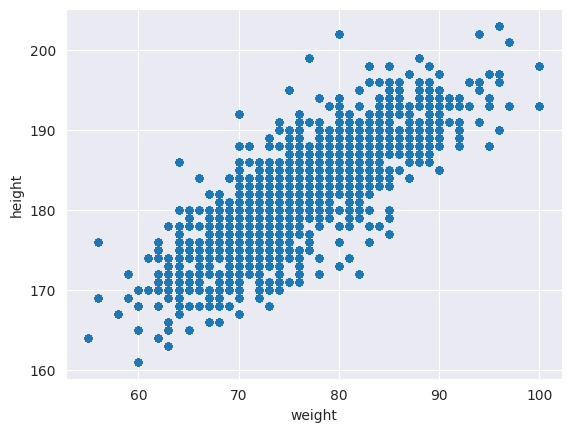

In [10]:
df.plot.scatter(x='weight', y='height')
plt.show()

In [11]:
from sklearn.decomposition import PCA

feature_columns = ['height', 'weight', 'games', 'victories', 'ties', 'defeats', 'goals', 'yellowCards', 'yellowReds', 'redCards']
#pca = PCA(n_components=2)

# we use fit_transform to immediately fit the data, and then transform it
# fitting is the process where we calculate the PCA vectors
# transforming is the process where we apply the PCA vectors to the data, this is where we reduce the number of features (after fitting, where we learned how to do it)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(df[feature_columns])
pca_feature_names = [f'feature{i}' for i in range(reduced_features.shape[1])]
df_pca = pd.DataFrame(reduced_features, columns=pca_feature_names)
df_pca

,feature0,feature1
0,-6.802216,-2.552945
1,1.843717,-2.246211
2,-4.101900,-2.578160
3,5.873456,-2.274697
4,-7.656601,-2.633974
...,...,...
115452,6.561605,-2.467267
115453,-9.764320,-2.413819
115454,13.028171,-2.277375
115455,-12.290349,-2.408758


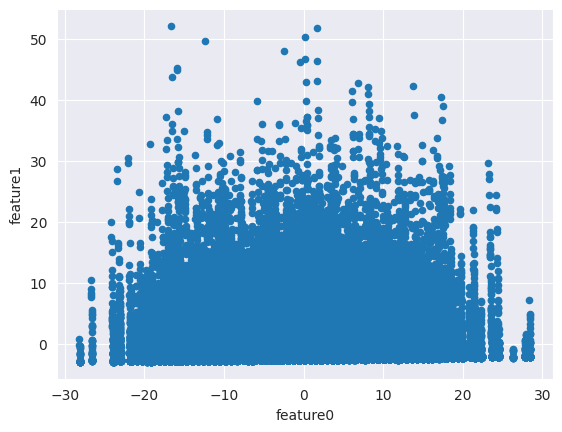

In [12]:
df_pca.plot.scatter(x='feature0', y='feature1')
plt.show()

# 5. Joins

Load the `countries` API data, then join it with the player data on the `leagueCountry` column. What is the `fifa` code for each player?

In [13]:
countries_df = pd.read_json(
    "https://drive.switch.ch/index.php/s/x0zUM0seQqigcU1/download"
)
countries_df["name"] = countries_df["name"].apply(lambda x: x["common"])
countries_df.head()

,name,tld,cca2,ccn3,cca3,independent,status,unMember,currencies,idd,...,continents,flags,coatOfArms,startOfWeek,capitalInfo,postalCode,borders,cioc,gini,fifa
0,French Polynesia,[.pf],PF,258.0,PYF,0.0,officially-assigned,False,"{'XPF': {'name': 'CFP franc', 'symbol': '₣'}}","{'root': '+6', 'suffixes': ['89']}",...,[Oceania],"{'png': 'https://flagcdn.com/w320/pf.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [-17.53, -149.56]}","{'format': '#####', 'regex': '^((97|98)7\d{2})$'}",NaN,NaN,NaN,NaN
1,Saint Martin,"[.fr, .gp]",MF,663.0,MAF,0.0,officially-assigned,False,"{'EUR': {'name': 'Euro', 'symbol': '€'}}","{'root': '+5', 'suffixes': ['90']}",...,[North America],"{'png': 'https://flagcdn.com/w320/mf.png', 'sv...",{},monday,"{'latlng': [18.07, -63.08]}",{'format': '### ###'},[SXM],NaN,NaN,NaN
2,Venezuela,[.ve],VE,862.0,VEN,1.0,officially-assigned,True,{'VES': {'name': 'Venezuelan bolívar soberano'...,"{'root': '+5', 'suffixes': ['8']}",...,[South America],"{'png': 'https://flagcdn.com/w320/ve.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [10.48, -66.87]}","{'format': '####', 'regex': '^(\d{4})$'}","[BRA, COL, GUY]",VEN,{'2006': 44.8},VEN
3,Réunion,[.re],RE,638.0,REU,0.0,officially-assigned,False,"{'EUR': {'name': 'Euro', 'symbol': '€'}}","{'root': '+2', 'suffixes': ['62']}",...,[Africa],"{'png': 'https://flagcdn.com/w320/re.png', 'sv...",{},monday,"{'latlng': [-20.88, 55.45]}","{'format': '#####', 'regex': '^((97|98)(4|7|8)...",NaN,NaN,NaN,NaN
4,El Salvador,[.sv],SV,222.0,SLV,1.0,officially-assigned,True,"{'USD': {'name': 'United States dollar', 'symb...","{'root': '+5', 'suffixes': ['03']}",...,[North America],"{'png': 'https://flagcdn.com/w320/sv.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [13.7, -89.2]}","{'format': 'CP ####', 'regex': '^(?:CP)*(\d{4}...","[GTM, HND]",ESA,{'2019': 38.8},SLV


Combine the two DataFrames on the `leagueCountry` column.

In [14]:
pd.merge(
    df,
    countries_df[["name", "fifa"]],
    how="left",
    left_on="leagueCountry",
    right_on="name",
)

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,avg_cards_per_game,name,fifa
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696,0.0,Spain,ESP
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,1.0,France,FRA
2,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,...,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.0,NaN,NaN
3,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,...,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.0,NaN,NaN
4,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,...,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115452,tom-huddlestone,Tom Huddlestone,Tottenham Hotspur,England,28.12.1986,188.0,80.0,Defensive Midfielder,1,0,...,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968,0.0,NaN,NaN
115453,tomas-rosicky,Tomáš Rosický,Arsenal FC,England,04.10.1980,178.0,67.0,Attacking Midfielder,1,1,...,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968,0.0,NaN,NaN
115454,winston-reid,Winston Reid,West Ham United,England,03.07.1988,190.0,87.0,Center Back,1,0,...,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968,0.0,NaN,NaN
115455,xherdan-shaqiri,Xherdan Shaqiri,Bayern München,Germany,10.10.1991,169.0,72.0,Left Midfielder,1,1,...,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968,0.0,Germany,GER


# 6. Forward and Backward Selection

Train a Naive Bayes classifier on our dataset.

*Hint*: Refer to the scikit-learn [documentation](https://scikit-learn.org/stable/modules/naive_bayes.html)

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

feature_columns = ['height', 'weight', 'games', 'victories', 'ties', 'defeats', 'goals', 'yellowCards', 'yellowReds', 'redCards']
X = df[feature_columns]
y = df['position']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = GaussianNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.21557249263814307

Now repeat this, but use forward selection to select 5 features.

*Hint*: You can use [`SequentialFeatureSelector`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html).

In [25]:
from sklearn.feature_selection import SequentialFeatureSelector

feature_columns = ['height', 'weight', 'games', 'victories', 'ties', 'defeats', 'goals', 'yellowCards', 'yellowReds', 'redCards']
X = df[feature_columns]
y = df['position']

sfs = SequentialFeatureSelector(GaussianNB(), n_features_to_select=5)
sfs.fit(X, y)
relevant_features = sfs.get_support()

In [26]:
# keep only features where sfs.get_support() is True
X = df[feature_columns].loc[:, relevant_features]
X

,height,weight,ties,defeats,yellowCards
0,177.0,72.0,0,1,0
1,179.0,82.0,0,1,1
5,182.0,71.0,0,1,0
6,187.0,80.0,0,0,0
7,180.0,68.0,0,1,0
...,...,...,...,...,...
146022,188.0,80.0,1,0,0
146023,178.0,67.0,0,0,0
146024,190.0,87.0,0,1,0
146025,169.0,72.0,0,0,0


In [27]:
y = df['position']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = GaussianNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.23570933656677637